In [2]:
import requests as rq
import json
import pandas as pd
import matplotlib.pyplot as plt

first step: get session key

In [9]:
country='Canada'
sessionName='Race'
year=str(2024)
canadagp_keys=json.loads(rq.get(f'https://api.openf1.org/v1/sessions?country_name={country}&session_name={sessionName}&year={year}').text)[0]

In [12]:
hamilton=pd.DataFrame(json.loads(rq.get(f'https://api.openf1.org/v1/intervals?driver_number=44&session_key={canadagp_keys["session_key"]}').text))

In [13]:
hamilton

,session_key,meeting_key,date,driver_number,gap_to_leader,interval
0,9531,1237,2024-06-09T18:03:23.424000+00:00,44,2.088,0.567
1,9531,1237,2024-06-09T18:03:30.374000+00:00,44,2.807,0.323
2,9531,1237,2024-06-09T18:03:35.899000+00:00,44,3.111,NaN
3,9531,1237,2024-06-09T18:03:40.392000+00:00,44,3.801,0.677
4,9531,1237,2024-06-09T18:03:45.567000+00:00,44,3.863,0.678
...,...,...,...,...,...,...
1314,9531,1237,2024-06-09T19:48:48.584000+00:00,44,5.172,0.619
1315,9531,1237,2024-06-09T19:48:53.039000+00:00,44,4.774,0.544
1316,9531,1237,2024-06-09T19:48:57.047000+00:00,44,4.767,0.512
1317,9531,1237,2024-06-09T19:48:59.842000+00:00,44,4.928,0.529


In [14]:
russell=pd.DataFrame(json.loads(rq.get(f'https://api.openf1.org/v1/intervals?driver_number=63&session_key={canadagp_keys["session_key"]}').text))

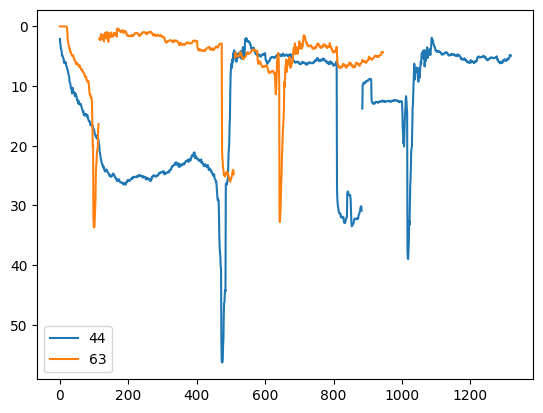

In [17]:
hamilton['datetime']=pd.to_datetime(hamilton['date'],format='mixed')
russell['datetime']=pd.to_datetime(russell['date'],format='mixed')
testx=pd.concat([hamilton,russell])
testx=testx.reset_index()
fig,ax=plt.subplots()
testgroup=testx.groupby('driver_number')
for i,group in testgroup:
    ax.plot(group['index'],group['gap_to_leader'],label=i)
ax.invert_yaxis()
ax.legend()

In [31]:
pd.DataFrame(json.loads(rq.get('https://api.openf1.org/v1/team_radio?session_key=9523&driver_number=1').text))

,session_key,meeting_key,driver_number,date,recording_url
0,9523,1236,1,2024-05-26T13:58:55.583000+00:00,https://livetiming.formula1.com/static/2024/20...
1,9523,1236,1,2024-05-26T15:03:14.548000+00:00,https://livetiming.formula1.com/static/2024/20...
2,9523,1236,1,2024-05-26T15:28:19.559000+00:00,https://livetiming.formula1.com/static/2024/20...
3,9523,1236,1,2024-05-26T15:28:19.559000+00:00,https://livetiming.formula1.com/static/2024/20...


In [30]:
rq.get('https://api.openf1.org/v1/sessions?country_name=Monaco&session_name=Race&year=2024').text

'[{"session_key":9523,"session_name":"Race","date_start":"2024-05-26T13:00:00+00:00","date_end":"2024-05-26T15:00:00+00:00","gmt_offset":"02:00:00","session_type":"Race","meeting_key":1236,"location":"Monaco","country_key":114,"country_code":"MON","country_name":"Monaco","circuit_key":22,"circuit_short_name":"Monte Carlo","year":2024}]'